### Прогноз цен на авиабилеты

Авиакомпания — это компания, предоставляющая услуги воздушных перевозок пассажиров и грузов. Авиакомпании используют самолеты для предоставления этих услуг и могут заключать партнерские соглашения или альянсы с другими авиакомпаниями в рамках соглашений о код-шеринге, согласно которым они обе предлагают и выполняют один и тот же рейс. Как правило, авиакомпании признаются на основании сертификата или лицензии на осуществление воздушных перевозок, выданной государственным авиационным органом. Авиакомпании могут быть регулярными или чартерными операторами.

Авиакомпании устанавливают цены на свои услуги, стремясь максимизировать прибыль. Ценообразование авиабилетов с годами стало значительно сложнее и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.

Цена авиабилета зависит от ряда факторов, таких как продолжительность полета, количество дней до вылета, время прибытия и отправления и т. д. Авиакомпании могут снижать стоимость в моменты, когда им необходимо нарастить спрос, и в моменты, когда билеты менее доступны. Они также могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы для установления соответствующей цены. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (МО) позволяют выводить такие правила и моделировать изменение цены.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [5]:
df = pd.read_csv("Clean_Dataset.csv", index_col=0)

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Описание набора данных

* **Airline** (Авиакомпания): Название авиакомпании хранится в столбце «Авиакомпания». Это категория, включающая 6 различных авиакомпаний.
* **Flight** (Рейс): Flight хранит информацию о коде рейса самолета. Это категориальный признак.
* **Source City** (Город-источник): Город, из которого вылетает самолет. Это категория, включающая 6 уникальных городов.
* **Departure Time** (Время отправления): это производная категориальная характеристика, полученная путем группировки временных периодов в интервалы. Она хранит информацию о времени отправления и имеет 6 уникальных временных меток.
* **Stops** (Остановки):Категориальный признак с тремя различными значениями, хранящий количество остановок между городами отправления и назначения.
* **Arrival Time** (Время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в интервалы. Она имеет шесть различных временных меток и содержит информацию о времени прибытия.
* **Destination City** (Город назначения): Город, где приземлится самолет. Это категория, включающая 6 уникальных городов.
* **Class** (Класс): Категориальный признак, содержащий информацию о классе места; имеет два различных значения: Бизнес и Эконом.
* **Duration** (Продолжительность): Непрерывный параметр, отображающий общее время, необходимое для поездки между городами в часах.
* **Days Left** (Осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
* **Price** (Цена): Целевая переменная хранит информацию о цене билета.
не билета.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Разведочный анализ данных (РАД, EDA)

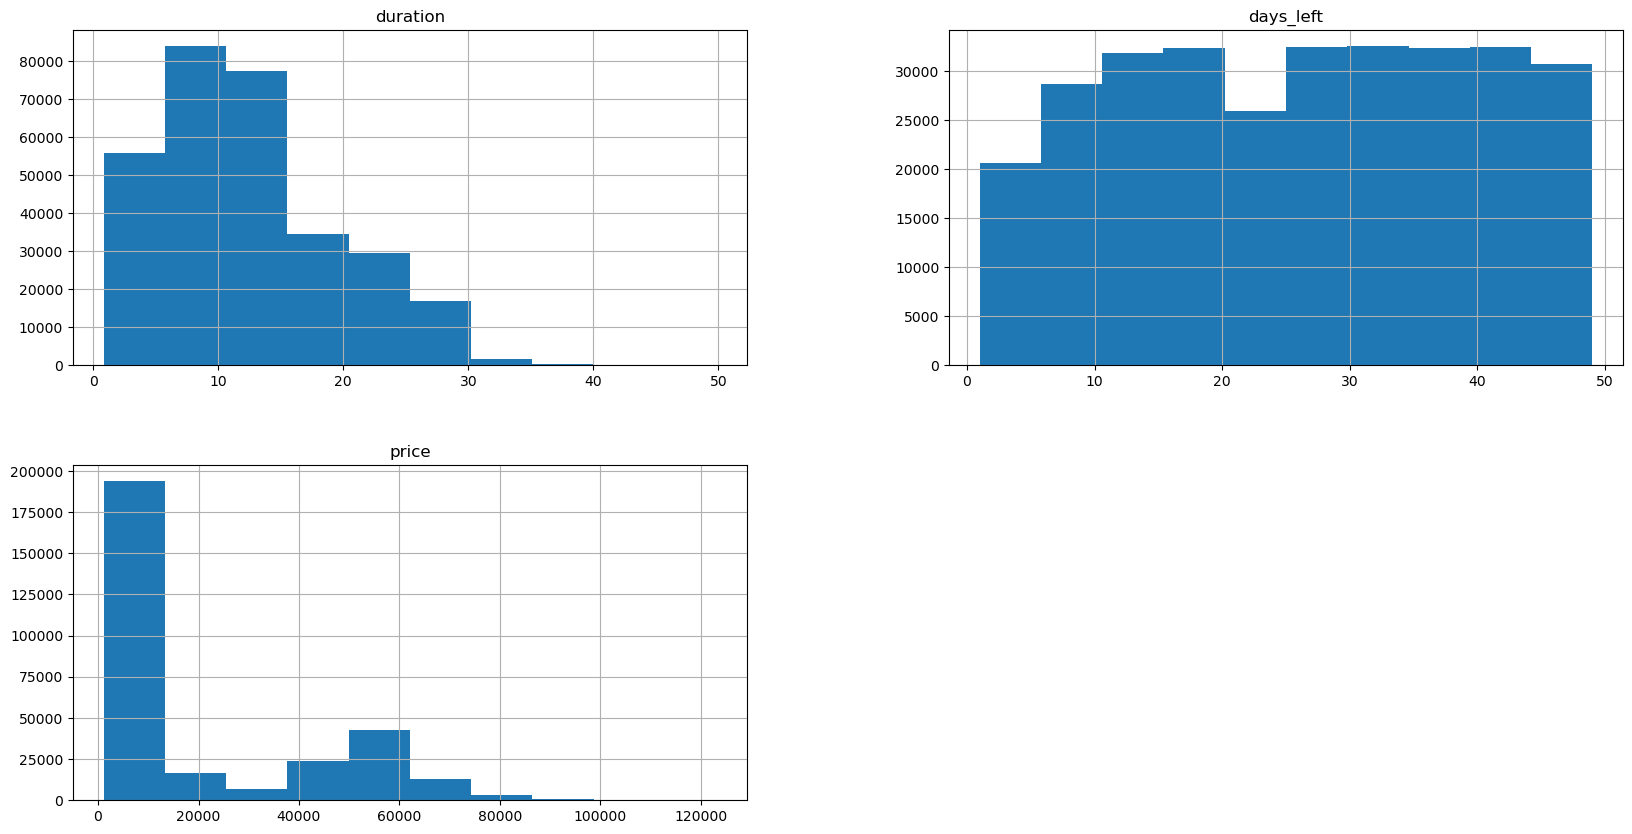

In [10]:
df.hist(figsize=(20,10));

In [11]:
cat_features = [column for column in df.columns if df[column].dtype =="object"]

In [12]:
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

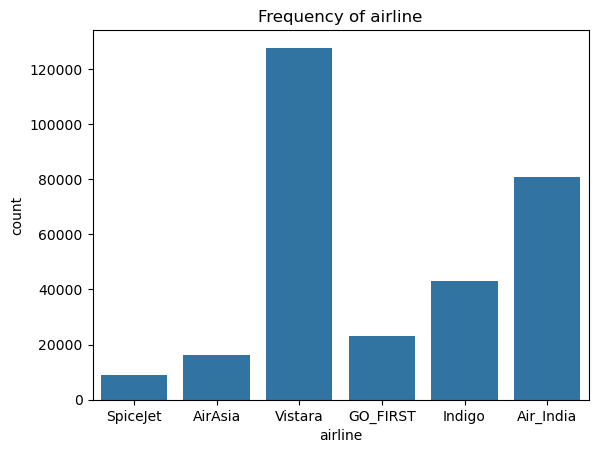

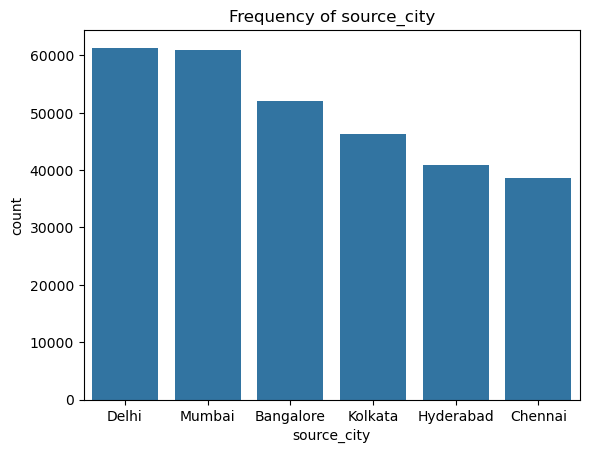

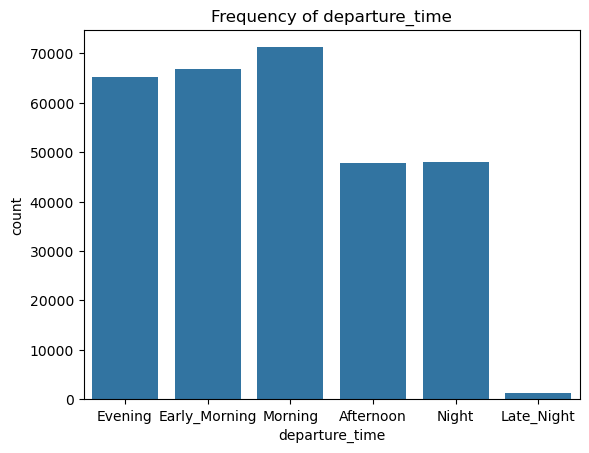

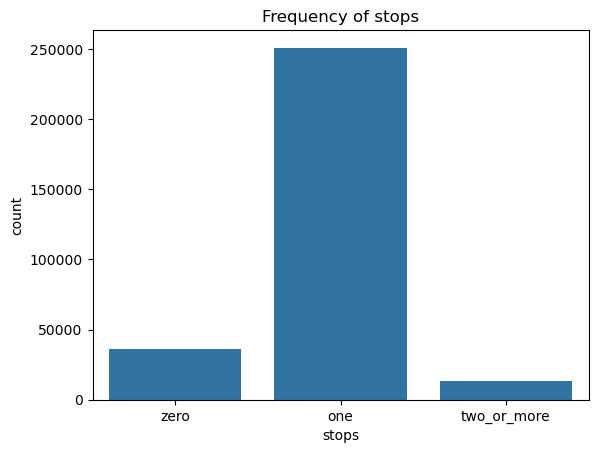

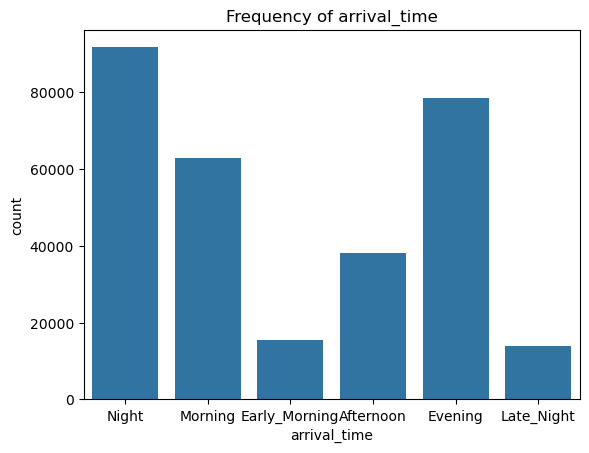

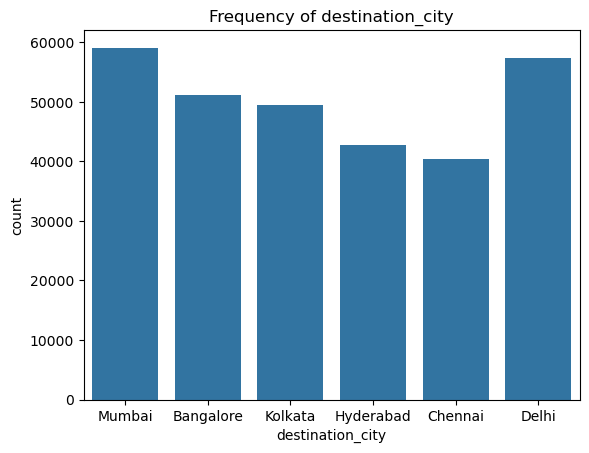

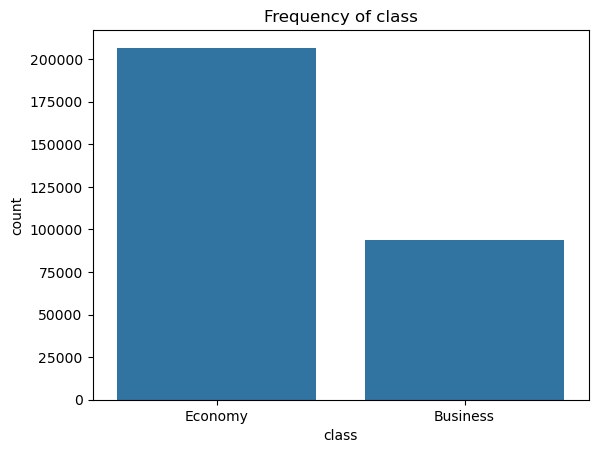

In [13]:
for column in cat_features:
    if column != 'flight':
        sns.countplot(x=df[column], data=df)
        plt.title("Frequency of " + column)
        plt.show()

In [14]:
df[df['flight']=='SG-8709']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...
42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [15]:
df[df['flight']=='SG-8709'].head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
919,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,7,5953
1105,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,8,5953
1331,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,9,6060
1493,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10,6270
1644,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,11,5953


In [16]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

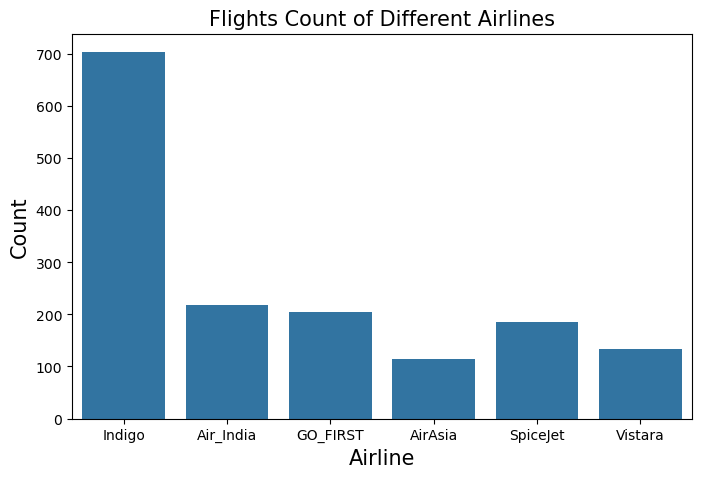

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Индиго одна из самых популярных авиакомпаний.

In [18]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

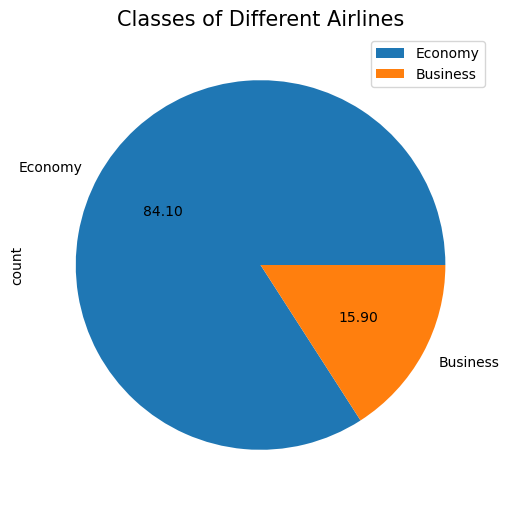

In [19]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

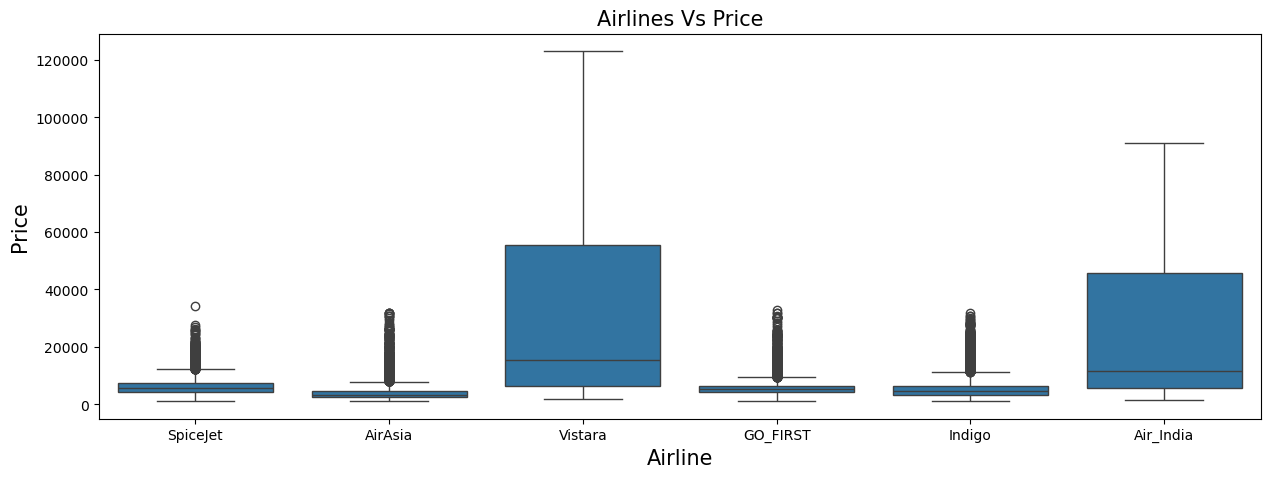

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Авиакомпании Vistara и Air India предлагают самые высокие цены по сравнению с другими. У SpiceJet, AirAsia, GO_First и Indigo цены примерно одинаковые.

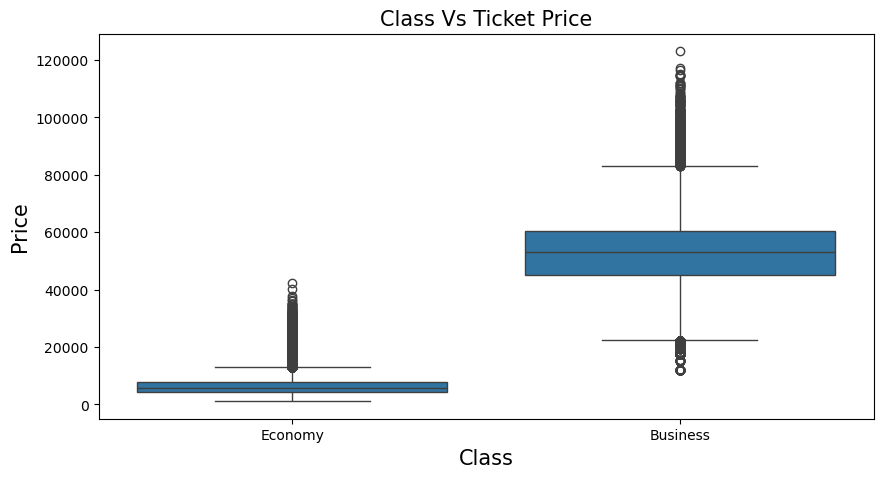

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билета в бизнес-классе выше, чем в эконом-классе.

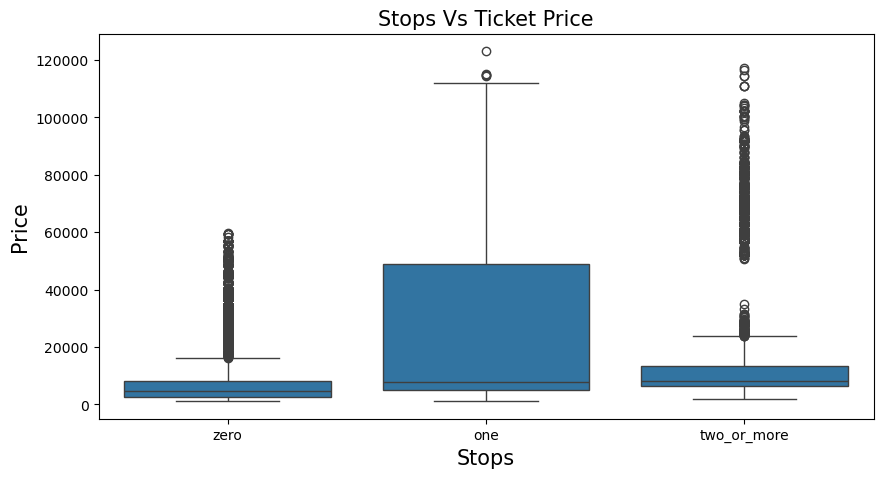

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На рейсах с одной пересадкой действует максимальная цена билета.

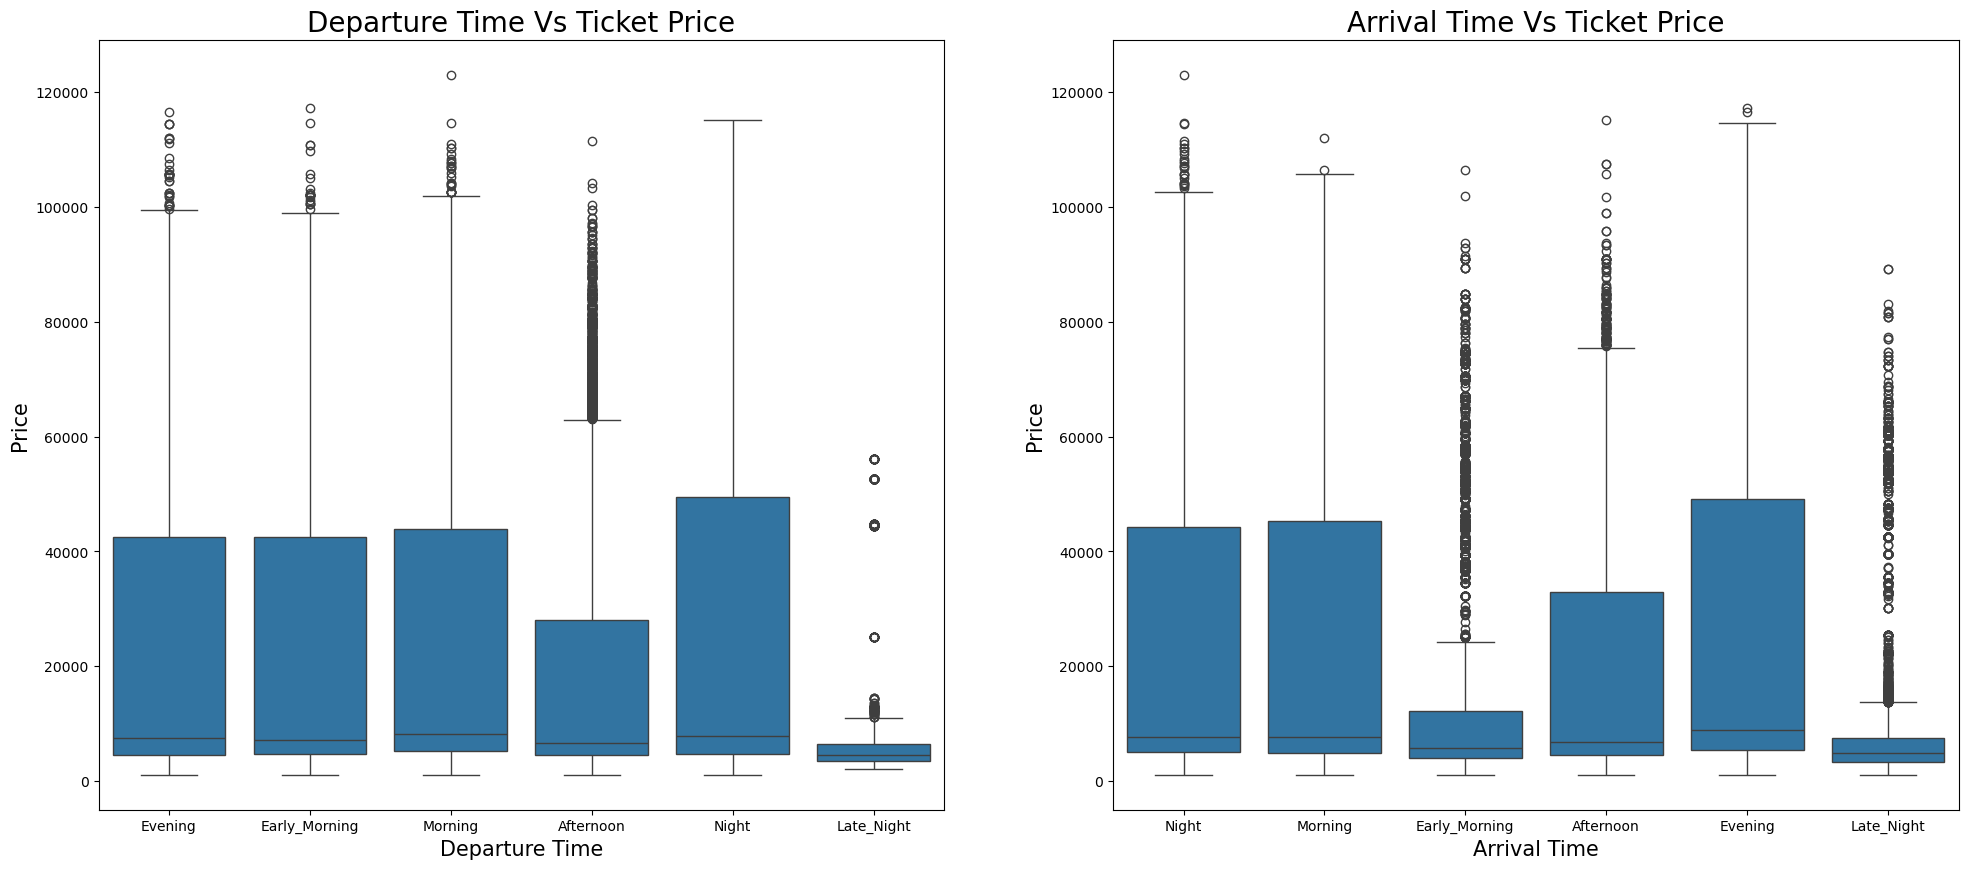

In [23]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Стоимость билетов на рейсы, вылетающие ночью, выше.
Стоимость билетов практически одинакова для рейсов с вылетом рано утром, утром и вечером.
Низкие цены на билеты на рейсы с поздним ночным вылетом.

Стоимость билетов на рейсы с прибытием вечером выше.
Стоимость билетов практически одинакова для рейсов, прибывающих утром и вечером.
Стоимость билетов низкая на рейсы с поздним ночным временем прибытия, совпадающим со временем отправления.

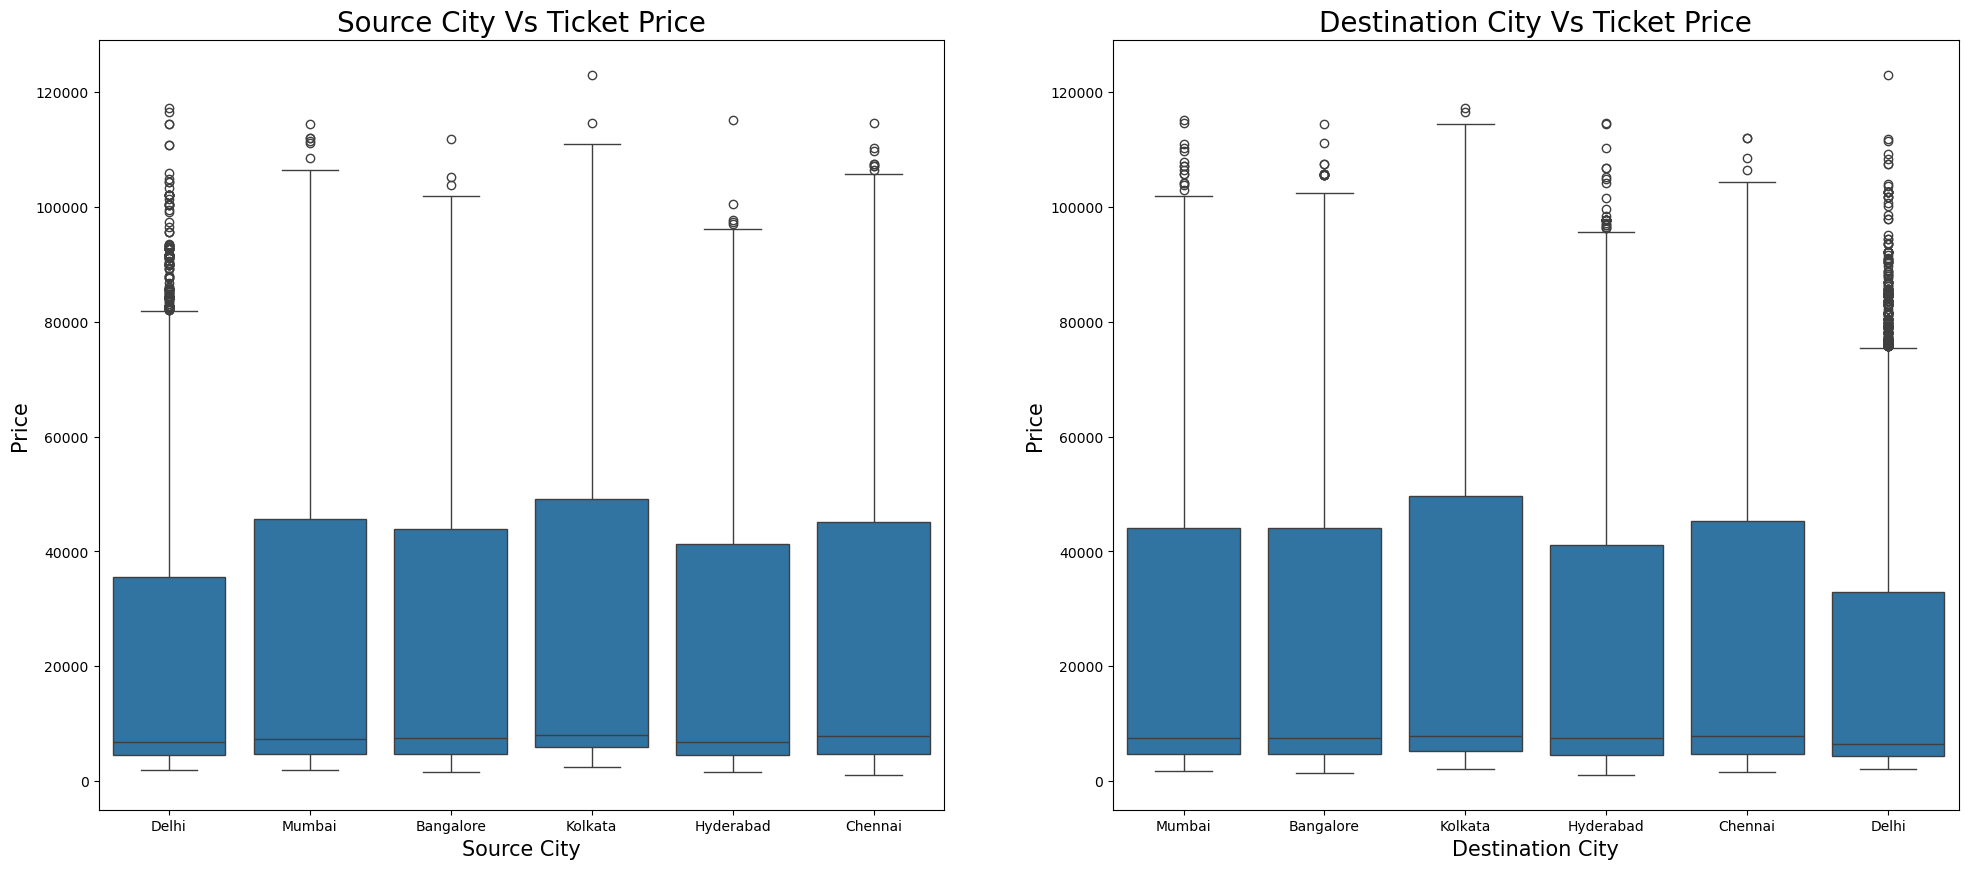

In [24]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билетов выше на рейсы, вылетающие из Калькутты.
Стоимость билетов практически одинакова для рейсов из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.
Цены на билеты на рейсы из Дели низкие.

Стоимость билетов выше на рейсы, пункты назначения которых — Калькутта и Ченнай.
Стоимость билетов на рейсы в такие города, как Мумбай и Бангалор, практически одинакова.
Цены на билеты на рейсы с городом назначения, таким как Дели, низкие.

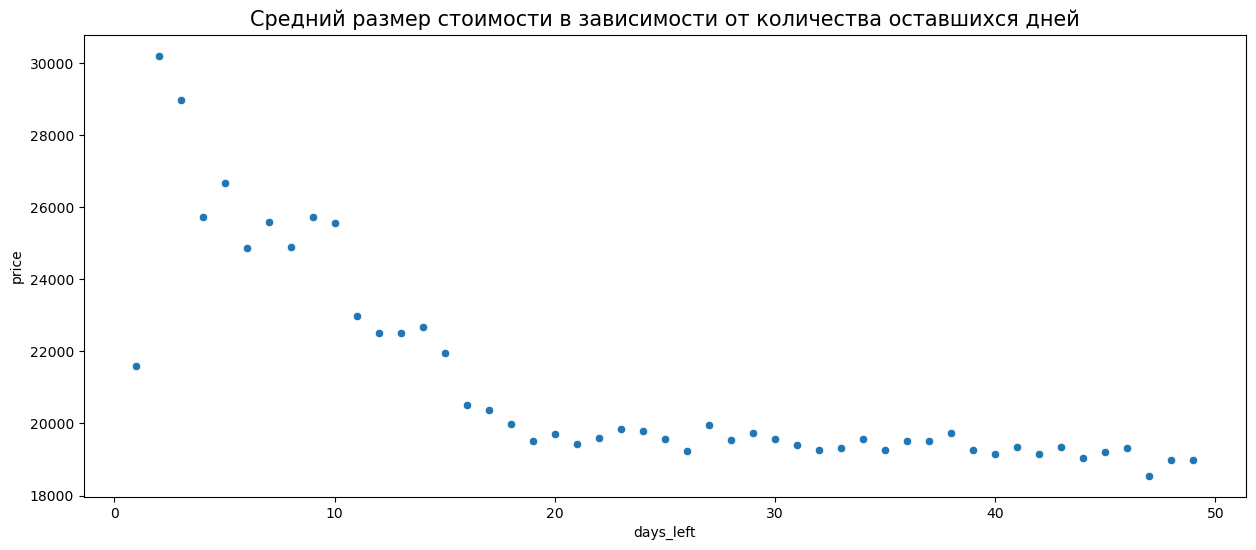

In [25]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Средний размер стоимости в зависимости от количества оставшихся дней",fontsize=15)

C:\Users\User\AppData\Local\Temp\ipykernel_2712\681095891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


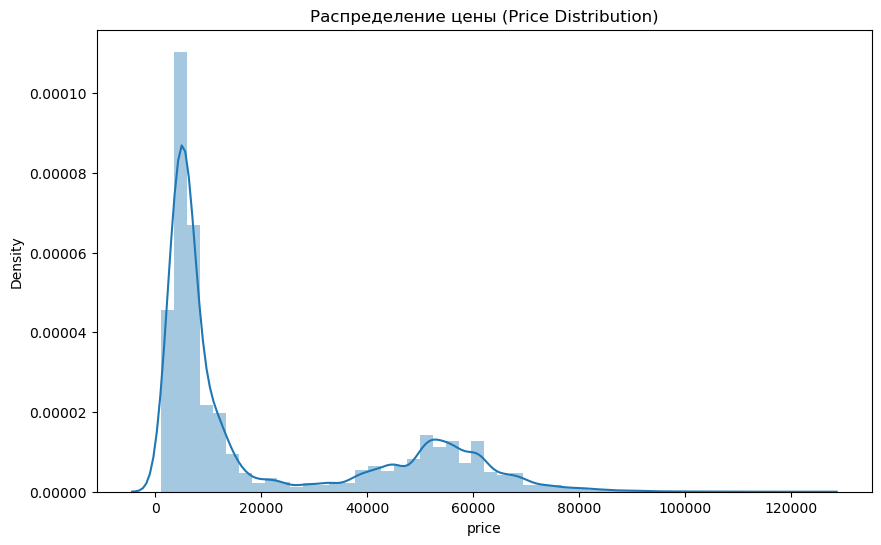

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.title('Распределение цены (Price Distribution)')
plt.show()

Я вижу четкое разделение на Эконом и Бизнес

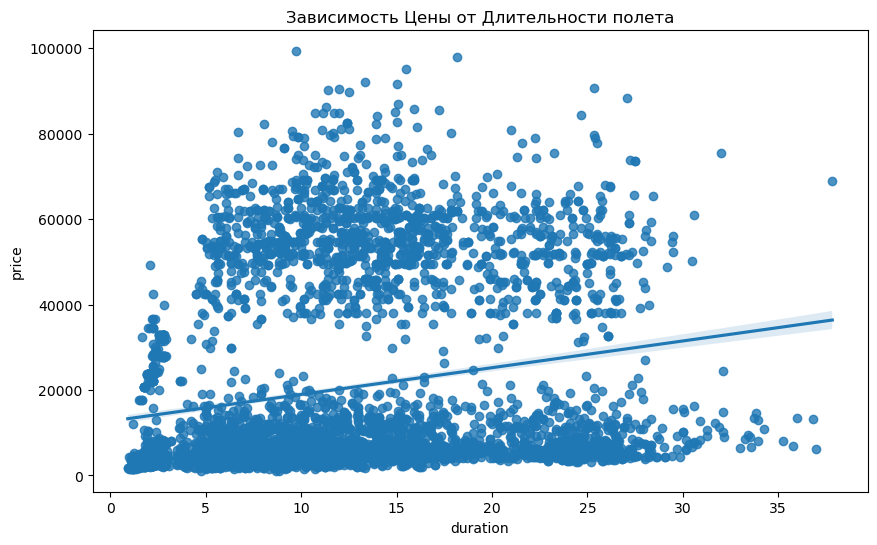

In [57]:
plt.figure(figsize=(10,6))
sns.regplot(x='duration', y='price', data=df.sample(5000))
plt.title('Зависимость Цены от Длительности полета')
plt.show()

график показывает слабую положительную линейную зависимость.

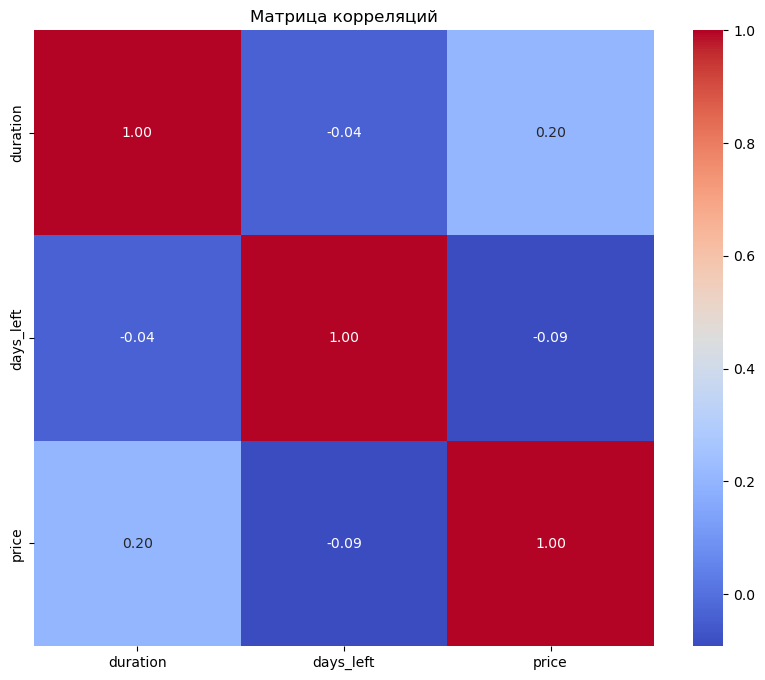

In [58]:
plt.figure(figsize=(10,8))
corr_matrix = df[['duration', 'days_left', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

Здесь заметная слабая зависимость цены от длительности полета.

In [ ]:
# Удаляю колонку flight, так как это просто идентификатор рейса и он не несет пользы для модели№
# df.drop(['flight'], axis=1, inplace=True)

# Подготовка данных

Разделение выборки

In [54]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Линейная регрессия

In [40]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [41]:
lrm.intercept_

np.float64(52692.147963767755)

In [42]:
lrm.coef_

array([ 4.19709106e+01, -1.33449900e+02,  1.11882552e+02,  1.69160315e+03,
        2.05062006e+03,  2.25780133e+03,  4.05031708e+03, -8.46895707e+01,
       -1.41322276e+03, -1.65842216e+03,  1.60230011e+03, -2.20676308e+02,
        8.55433759e+02,  7.45931611e+02,  1.60327110e+03,  8.50136765e+02,
        7.12974703e+02,  2.06603423e+03, -7.56770500e+03, -7.36620389e+02,
        9.01700151e+02,  9.25633204e+02,  4.62248755e+02,  1.14677209e+03,
       -2.47346447e+02, -1.54237927e+03, -1.73094930e+03,  1.37592129e+03,
       -2.51139803e+01, -4.49522202e+04])

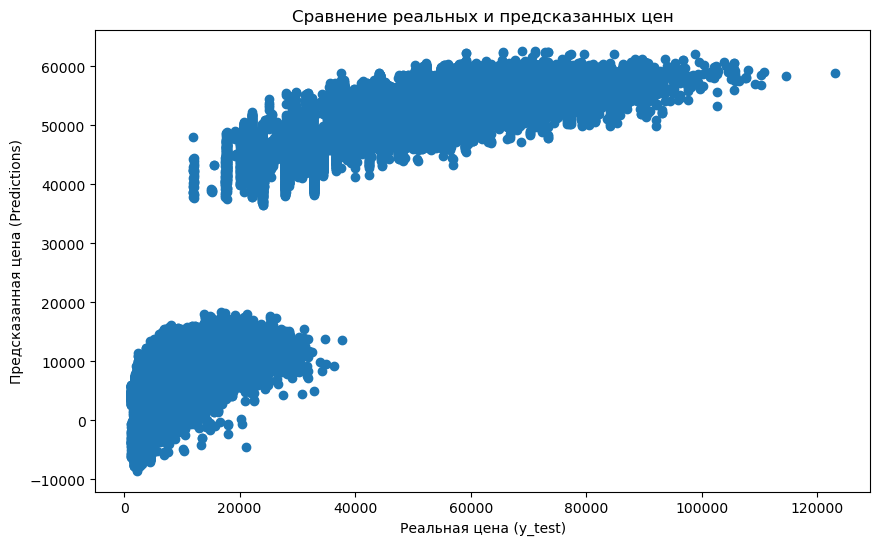

In [65]:
predictions = lm.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Реальная цена (y_test)')
plt.ylabel('Предсказанная цена (Predictions)')
plt.title('Сравнение реальных и предсказанных цен')
plt.show()

In [61]:
y_test.round(3)

156879     4506
20513      5954
27520      9861
240223    58125
214726    52522
          ...  
206182     1105
253259    51817
79468     10264
46929      2339
198572    21317
Name: price, Length: 120062, dtype: int64

<Axes: xlabel='price'>

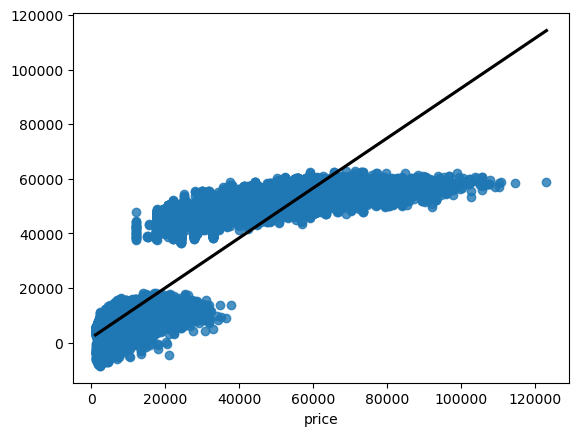

In [63]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})


Тут я увидела, что время полета не важна так как класса в котором ты летишь

C:\Users\User\AppData\Local\Temp\ipykernel_2712\202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<Axes: xlabel='price', ylabel='Density'>

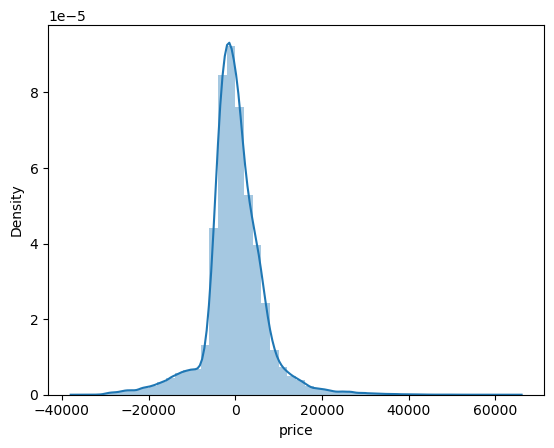

In [64]:
sns.distplot((y_test - predictions))

Вообщем мы понимаем, что класс обслуживания (Эконом или Бизнес)
является главным фактором, формирующим цену билета и разделяющим рынок
на два изолированных сегмента, тогда как длительность полета и срок бронирования играют лишь второстепенную роль

# Метрики качества

In [68]:
from sklearn import metrics

print('MAE (Средняя абсолютная ошибка):', metrics.mean_absolute_error(y_test, predictions))
print('MSE (Среднеквадратичная ошибка):', metrics.mean_squared_error(y_test, predictions))
print('RMSE (Корень из среднеквадратичной ошибки):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE (Средняя абсолютная ошибка): 4554.936803883475
MSE (Среднеквадратичная ошибка): 45473582.251375094
RMSE (Корень из среднеквадратичной ошибки): 6743.41028348232


In [ ]:
RMSE показывает о средней погрешности модели в тех же единицах, что и цена.

In [70]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print(f'R2 Square {r2_square:.2f}')

In [71]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [74]:
train_pred = lrm.predict(X_train)
test_pred = lrm.predict(X_test)

In [75]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 4554.936803883475
MSE: 45473582.251375094
RMSE: 6743.41028348232
R2 Square 0.91

Train:
_____________________________________
MAE: 4568.302971450324
MSE: 45716233.92807452
RMSE: 6761.378108645789
R2 Square 0.91


Результаты теста и обучение практически одинаковы и имеют качественный результат

In [84]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

In [85]:
results_df2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

# Модель KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)


In [87]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [88]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 7967.763745398212
MSE: 136521971.3260109
RMSE: 11684.261693663444
R2 Square 0.73

Train:
_____________________________________
MAE: 6308.810287021562
MSE: 89101715.30276337
RMSE: 9439.37049292819
R2 Square 0.83


Тут же тестовые и обучаемые модели имеют разницу, причем тестовые данные обучились чуть хуже

In [89]:
results_df2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### Модель DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [93]:
train_pred = tree_1.predict(X_train)
test_pred = tree_1.predict(X_test)

In [94]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 2584.190845683732
MSE: 21009506.132122774
RMSE: 4583.612781651911
R2 Square 0.96

Train:
_____________________________________
MAE: 2578.136102178192
MSE: 20837942.406208698
RMSE: 4564.859516590702
R2 Square 0.96


In [ ]:
results_df2 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### Модель RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


In [ ]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

In [ ]:
results_df2 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

### Сравнение моделей

In [ ]:
results_df

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(10, 5))

In [ ]:
df.head()

In [ ]:
Вывод: просмотрела структуру данных, посмотрела зависимости, метрики. Построила линейную регрессию и другие модели.